In [1]:
from pyedflib import highlevel
import pyedflib as plib
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

def read_file_signal(file_path, index):
    f = plib.EdfReader(file_path)
    signal = f.readSignal(index)
    f.close()
    return signal

def signal_labels(file_path):
    f = plib.EdfReader(file_path)
    labels = f.getSignalLabels()
    f.close()
    return labels

def combined_signal(file_list, index):
    combined_signals = []
    for file in file_list:
        temp = read_file_signal(file, index)
        combined_signals.append(temp)
    return np.concatenate(combined_signals)

edf_files_1 = [
    "c:\\Users\\anany\\Downloads\\00000349-297469[001].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[002].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[003].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[004].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[005].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[006].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[007].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[008].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[009].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[010].edf"
]

edf_files_2 = [
    "C:\\Users\\anany\\Downloads\\00000344-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[008].edf"
]

edf_files_3 = [
    "C:\\Users\\anany\\Downloads\\00000338-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[009].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[010].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[011].edf"
]

edf_files_4 = [
    "C:\\Users\\anany\\Downloads\\00000336-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[009].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[010].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[011].edf"
]

labels = signal_labels(edf_files_1[0])
labels[16] = "Flow patient 1"
labels[17] = "Flow patient 2"
labels[23] = "Flow patient 3"
print(labels)

['EEG F3-A2', 'EEG F4-A1', 'EEG A1-A2', 'EEG C3-A2', 'EEG C4-A1', 'EEG O1-A2', 'EEG O2-A1', 'EOG LOC-A2', 'EOG ROC-A1', 'EMG Chin', 'Leg 1', 'Leg 2', 'ECG I', 'RR', 'ECG II', 'Snore', 'Flow patient 1', 'Flow patient 2', 'Effort THO', 'Effort ABD', 'SpO2', 'Pleth', 'Body', 'Flow patient 3', 'xPAP CPAP', 'xPAP IPAP', 'xPAP EPAP', 'Leak Total', 'PulseRate', 'PressCheck', 'ECG IIHF', 'Technical']


In [2]:
def plot_signal(label, signal):
    plt.figure(figsize=(20, 10))
    plt.plot(signal)
    plt.title(f"{label} signal")
    plt.xlabel("time")
    plt.ylabel("amplitude")
    # plt.ylim(-300, 300)
    plt.show()

def thresholding(signal, threshold):
    mean = signal.mean()
    std = np.std(signal)
    lower_limit = mean - threshold * std
    upper_limit = mean + threshold * std
    filtered_signal = np.where((signal >= lower_limit) & (signal <= upper_limit), signal, mean)
    return filtered_signal

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

def mean_of_interval(signal, start, end):
    return stat.mean(signal[start:end])

In [4]:
import xml.etree.ElementTree as ET

# Function to parse the XML and print stages
file_path = 'C:\\Users\\anany\\Desktop\\SEM5\\DH307\\OSA\\user336.rml'
    # Parse the XML file
tree = ET.parse(file_path)
root = tree.getroot()

# Iterate through each Stage element in the XML
for stage in root.findall('.//User/Stage'):
    stage_type = stage.get('Type')  # Get the 'Type' attribute
    start_time = stage.get('Start')  # Get the 'Start' attribute
    
    # Print the stage type and start time
    print(f'Stage Type: {stage_type}, Start: {start_time}')

Stage Type: Wake, Start: 0
Stage Type: NonREM1, Start: 1980
Stage Type: Wake, Start: 2610
Stage Type: NonREM1, Start: 2730
Stage Type: Wake, Start: 2790
Stage Type: NonREM1, Start: 2850
Stage Type: NonREM2, Start: 3060
Stage Type: NonREM3, Start: 3840
Stage Type: Wake, Start: 4890
Stage Type: NonREM1, Start: 5070
Stage Type: Wake, Start: 5220
Stage Type: NonREM1, Start: 5640
Stage Type: Wake, Start: 5880
Stage Type: NonREM1, Start: 6360
Stage Type: NonREM2, Start: 6540
Stage Type: NonREM3, Start: 8100
Stage Type: Wake, Start: 8250
Stage Type: NonREM2, Start: 8310
Stage Type: NonREM3, Start: 8580
Stage Type: NonREM2, Start: 8790
Stage Type: NonREM3, Start: 8970
Stage Type: NonREM2, Start: 9240
Stage Type: NonREM3, Start: 9480
Stage Type: Wake, Start: 10110
Stage Type: NonREM2, Start: 10200
Stage Type: Wake, Start: 10380
Stage Type: NonREM2, Start: 10590
Stage Type: NonREM3, Start: 10830
Stage Type: Wake, Start: 11580
Stage Type: NonREM1, Start: 11640
Stage Type: NonREM3, Start: 11760
St

In [5]:
def find_intervals_user(type, root):
    time_intervals = []
    time_pair = []
    for stage in root.findall('.//User/Stage'):
        stage_type = stage.get('Type')
        start_time = int(stage.get('Start'))

        if stage_type == type:
            if len(time_pair) == 0:
                time_pair.append(start_time)
        else:
            if len(time_pair) == 1:
                time_pair.append(start_time)
                time_intervals.append(time_pair)
                time_pair = []

    return time_intervals

In [6]:
user_wake_times = find_intervals_user('Wake', root)
print(user_wake_times)
user_nrem1_times = find_intervals_user('NonREM1', root)
user_nrem1_times.append([37140, 37920])
print(user_nrem1_times)
user_nrem2_times = find_intervals_user('NonREM2', root) 
print(user_nrem2_times)
user_nrem3_times = find_intervals_user('NonREM3', root)
print(user_nrem3_times)
user_rem_times = find_intervals_user('REM', root)
print(user_rem_times)

[[0, 1980], [2610, 2730], [2790, 2850], [4890, 5070], [5220, 5640], [5880, 6360], [8250, 8310], [10110, 10200], [10380, 10590], [11580, 11640], [12090, 12210], [12510, 12720], [12990, 13170], [13620, 15600], [17460, 17610], [19920, 20100], [20520, 20730], [21990, 22140], [22200, 22350], [22440, 22560], [22620, 22770], [23430, 23520], [24120, 24180], [24540, 24870], [26040, 26430], [26970, 27210], [28410, 28560], [28590, 28710], [29430, 29520], [29880, 29970], [30450, 30840], [30930, 31080], [32040, 32130], [32670, 33090], [33270, 33390], [36150, 36360], [36630, 36720]]
[[1980, 2610], [2730, 2790], [2850, 3060], [5070, 5220], [5640, 5880], [6360, 6540], [11640, 11760], [12720, 12900], [13170, 13380], [15600, 15990], [17610, 17760], [20730, 20820], [22140, 22200], [22350, 22440], [22560, 22620], [22770, 23100], [24180, 24270], [24870, 25140], [25350, 25470], [26430, 26850], [28560, 28590], [28710, 28950], [29130, 29340], [30840, 30930], [31080, 31140], [31860, 32040], [32130, 32310], [33

In [7]:
#WAKE USER
mean_user_wake_dict = {}

for i in range(len(labels)):
    mean_user_wake = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 39600)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in user_wake_times:
        mean_user_wake.append(mean_of_interval(thresholded_signal, start, end))
    mean_user_wake_dict[labels[i]] = mean_user_wake
    if len(mean_user_wake) == len(user_wake_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [8]:
#nrem1 USER
mean_user_nrem1_dict = {}

for i in range(len(labels)):
    mean_user_nrem1 = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 39600)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in user_nrem1_times:
        mean_user_nrem1.append(mean_of_interval(thresholded_signal, start, end))
    mean_user_nrem1_dict[labels[i]] = mean_user_nrem1
    if len(mean_user_nrem1) == len(user_nrem1_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [9]:
#nrem2 USER
mean_user_nrem2_dict = {}

for i in range(len(labels)):
    mean_user_nrem2 = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 39600)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in user_nrem2_times:
        mean_user_nrem2.append(mean_of_interval(thresholded_signal, start, end))
    mean_user_nrem2_dict[labels[i]] = mean_user_nrem2
    if len(mean_user_nrem2) == len(user_nrem2_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [10]:
#nrem3 USER
mean_user_nrem3_dict = {}

for i in range(len(labels)):
    mean_user_nrem3 = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 39600)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in user_nrem3_times:
        mean_user_nrem3.append(mean_of_interval(thresholded_signal, start, end))
    mean_user_nrem3_dict[labels[i]] = mean_user_nrem3
    if len(mean_user_nrem3) == len(user_nrem3_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [11]:
#rem USER
mean_user_rem_dict = {}

for i in range(len(labels)):
    mean_user_rem = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 39600)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in user_rem_times:
        mean_user_rem.append(mean_of_interval(thresholded_signal, start, end))
    mean_user_rem_dict[labels[i]] = mean_user_rem
    if len(mean_user_rem) == len(user_rem_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [12]:
print(mean_user_nrem1_dict[labels[0]])
print(mean_user_nrem1_dict[labels[1]])

[-2.53716175486923, -7.540068536549023, -3.561148000286667, -2.6431624014120594, -5.942095115276386, -1.7723081925290576, -2.6312062300540084, -4.909832173392386, -4.8504332892913, -1.93925223627968, -4.435418944463524, -2.58332150885369, -5.327239803748301, -4.1672113419081285, -8.69108120939796, -5.4447952622011915, -2.867863953265509, -4.3463285066272395, -3.724435588559571, -6.8314377915484465, -9.929337766705297, -4.859820169964839, -4.231077232783955, -5.906341729087063, -4.8030845924448125, -5.725643572575895, -5.842288233562378, -6.963481947770273, -2.4453145803243994, -5.555202259141266, -7.00050010307698, -5.6157928183492904, -6.381502364802864, -4.515944122922808]
[-9.894941973129033, -12.95487314040963, -9.806915621424812, -13.726250594338113, -14.008109157587985, -10.769529822764403, -9.813443295720814, -10.683046496445925, -12.785224353051388, -11.319395155229694, -12.231312487568527, -12.174495838793593, -12.06051504020277, -9.538790126908985, -15.860934390785062, -14.08

In [13]:
total_mean_wake_dict_user = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_user_wake_dict[labels[i]]):
        mean+=item
    total_mean_wake_dict_user[labels[i]] = mean/len(mean_user_wake_dict[labels[i]])

print(total_mean_wake_dict_user)

{'EEG F3-A2': -4.999733604559409, 'EEG F4-A1': -13.120708383515522, 'EEG A1-A2': 0.16543163228268495, 'EEG C3-A2': -5.720523820576772, 'EEG C4-A1': 8.364647420430718, 'EEG O1-A2': -1.0109214987885802, 'EEG O2-A1': 9.292714037418836, 'EOG LOC-A2': 13.587556733187274, 'EOG ROC-A1': -5.266951901268458, 'EMG Chin': -0.4546869710789902, 'Leg 1': -0.1492704090275843, 'Leg 2': -0.2103874590499523, 'ECG I': -52.987845258927244, 'RR': 192.75687458060094, 'ECG II': -62.01009954802521, 'Snore': -0.02317334313927673, 'Flow patient 1': -0.008970767394886997, 'Flow patient 2': 1.5860046319024623, 'Effort THO': -0.024979919991080995, 'Effort ABD': -0.08669897492911005, 'SpO2': 96.3046480366881, 'Pleth': -0.23023654255399423, 'Body': 6.00206597344781, 'Flow patient 3': 0.042274470642654896, 'xPAP CPAP': 13.607213436389678, 'xPAP IPAP': 13.607213436389678, 'xPAP EPAP': 11.174781003957246, 'Leak Total': 33.16739020769408, 'PulseRate': 65.55608533593058, 'PressCheck': 0.0, 'ECG IIHF': -54.23480207716416,

In [14]:
total_mean_nrem1_dict_user = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_user_nrem1_dict[labels[i]]):
        mean+=item
    total_mean_nrem1_dict_user[labels[i]] = mean/len(mean_user_nrem1_dict[labels[i]])

print(total_mean_nrem1_dict_user)

{'EEG F3-A2': -4.89768039217722, 'EEG F4-A1': -12.808075477573684, 'EEG A1-A2': 0.13850505876179314, 'EEG C3-A2': -5.941365916311973, 'EEG C4-A1': 8.099610627074002, 'EEG O1-A2': -1.5033251085141277, 'EEG O2-A1': 8.772052753879464, 'EOG LOC-A2': 13.722449137194667, 'EOG ROC-A1': -4.725147678354247, 'EMG Chin': -2.1344845095252296, 'Leg 1': -0.019220201912896084, 'Leg 2': -0.010425353860935583, 'ECG I': -43.03595992305737, 'RR': 192.04358573350277, 'ECG II': -33.93900591099635, 'Snore': -0.027480515242704888, 'Flow patient 1': -0.00539904845937141, 'Flow patient 2': 1.2689070536822562, 'Effort THO': -0.04323770780332016, 'Effort ABD': -0.04203758141323405, 'SpO2': 96.7790705585743, 'Pleth': -0.040139269501411695, 'Body': 6.002264745560806, 'Flow patient 3': -0.09953440007810664, 'xPAP CPAP': 15.690535601493968, 'xPAP IPAP': 15.690535601493968, 'xPAP EPAP': 12.925829719141024, 'Leak Total': 38.33558412838213, 'PulseRate': 66.14153414244147, 'PressCheck': 0.0, 'ECG IIHF': -34.122944187783

In [15]:
total_mean_nrem2_dict_user = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_user_nrem2_dict[labels[i]]):
        mean+=item
    total_mean_nrem2_dict_user[labels[i]] = mean/len(mean_user_nrem2_dict[labels[i]])

print(total_mean_nrem2_dict_user)

{'EEG F3-A2': -5.900900796848791, 'EEG F4-A1': -13.762473013038422, 'EEG A1-A2': 0.17159898816511568, 'EEG C3-A2': -5.9873332104660575, 'EEG C4-A1': 8.219958566864932, 'EEG O1-A2': -0.7223443801565639, 'EEG O2-A1': 8.51556087117874, 'EOG LOC-A2': 13.166355535257756, 'EOG ROC-A1': -5.066249994692829, 'EMG Chin': -1.8357845922414846, 'Leg 1': -0.15799055596006595, 'Leg 2': -0.11556596892275516, 'ECG I': -48.704567884188236, 'RR': 192.00454126115702, 'ECG II': -47.5586488346657, 'Snore': -0.013165833097518481, 'Flow patient 1': 0.0065636695192551235, 'Flow patient 2': 1.25765096742702, 'Effort THO': -0.00745330362252181, 'Effort ABD': -0.04300074666377152, 'SpO2': 96.12655299175228, 'Pleth': -0.06633501056589017, 'Body': 6.007199799208756, 'Flow patient 3': -0.05980199045913452, 'xPAP CPAP': 14.534670620167116, 'xPAP IPAP': 14.534670620167116, 'xPAP EPAP': 12.080846737776968, 'Leak Total': 36.087988360241994, 'PulseRate': 65.2421743262597, 'PressCheck': 0.0, 'ECG IIHF': -46.84421985275531

In [16]:
total_mean_nrem3_dict_user = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_user_nrem3_dict[labels[i]]):
        mean+=item
    total_mean_nrem3_dict_user[labels[i]] = mean/len(mean_user_nrem3_dict[labels[i]])

print(total_mean_nrem3_dict_user)

{'EEG F3-A2': -5.160257176503381, 'EEG F4-A1': -12.281343169707242, 'EEG A1-A2': 0.16605874693567618, 'EEG C3-A2': -5.555883749057482, 'EEG C4-A1': 8.636562887339146, 'EEG O1-A2': -0.6043738681249007, 'EEG O2-A1': 9.045905084631766, 'EOG LOC-A2': 13.296802020715388, 'EOG ROC-A1': -4.893825588930222, 'EMG Chin': -0.5224124497438339, 'Leg 1': -0.018042059755788917, 'Leg 2': -0.07847074306345753, 'ECG I': -47.40960166763475, 'RR': 192.84255756368, 'ECG II': -75.95712086949699, 'Snore': -0.030370393939309837, 'Flow patient 1': 0.008070959840819607, 'Flow patient 2': 1.9705846443691792, 'Effort THO': -0.06890437777862908, 'Effort ABD': -0.09320514009637265, 'SpO2': 95.60298482462285, 'Pleth': -0.14090615621420335, 'Body': 6.013698299007011, 'Flow patient 3': 0.03931777021513358, 'xPAP CPAP': 11.960102702371714, 'xPAP IPAP': 11.960102702371714, 'xPAP EPAP': 10.065006693430723, 'Leak Total': 29.398041086012665, 'PulseRate': 64.5156726829697, 'PressCheck': 0.0, 'ECG IIHF': -71.20150891557914, 

In [17]:
total_mean_rem_dict_user = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_user_rem_dict[labels[i]]):
        mean+=item
    total_mean_rem_dict_user[labels[i]] = mean/len(mean_user_rem_dict[labels[0]])

print(total_mean_rem_dict_user)

{'EEG F3-A2': -4.686167457835091, 'EEG F4-A1': -12.791103090344853, 'EEG A1-A2': 0.18852832478336198, 'EEG C3-A2': -6.034133051273859, 'EEG C4-A1': 8.380083138309418, 'EEG O1-A2': -1.1542226115443326, 'EEG O2-A1': 9.085368850631474, 'EOG LOC-A2': 13.610168702067305, 'EOG ROC-A1': -4.788918080598389, 'EMG Chin': 0.5749237791223609, 'Leg 1': -0.18824542534066824, 'Leg 2': -0.19680805904404372, 'ECG I': -53.165522794554, 'RR': 191.995994649306, 'ECG II': -19.369549067417672, 'Snore': -0.010740150468190117, 'Flow patient 1': 0.003202960184892654, 'Flow patient 2': -0.04437827581968375, 'Effort THO': -0.0029184349915915985, 'Effort ABD': -0.016346734501825683, 'SpO2': 97.05708615535038, 'Pleth': 0.1764840580657603, 'Body': 6.0, 'Flow patient 3': 0.2513062336259891, 'xPAP CPAP': 21.194561080896595, 'xPAP IPAP': 21.194561080896595, 'xPAP EPAP': 17.558197444532958, 'Leak Total': 51.07471405246199, 'PulseRate': 64.96610157977929, 'PressCheck': 0.0, 'ECG IIHF': -20.068574348704143, 'Technical': 

In [18]:
total_var_wake_dict_user = {}
for i in range(len(labels)):
    variance = np.var(mean_user_wake_dict[labels[i]])
    total_var_wake_dict_user[labels[i]] = variance

print(total_var_wake_dict_user)

{'EEG F3-A2': 4.984035854424346, 'EEG F4-A1': 8.484933468701543, 'EEG A1-A2': 0.011261177736099446, 'EEG C3-A2': 5.456450100443366, 'EEG C4-A1': 7.2144437548620575, 'EEG O1-A2': 3.3966704629576343, 'EEG O2-A1': 4.567032439645045, 'EOG LOC-A2': 6.712202614090114, 'EOG ROC-A1': 5.177633271942549, 'EMG Chin': 4.217564537544567, 'Leg 1': 0.09678819671479003, 'Leg 2': 0.10564827186463255, 'ECG I': 1683.4843838619697, 'RR': 3.9112128628698923, 'ECG II': 12816.39633763003, 'Snore': 0.01039097850720348, 'Flow patient 1': 0.0013360358835164774, 'Flow patient 2': 5.99830934855443, 'Effort THO': 0.02086411127521593, 'Effort ABD': 0.03334338368679671, 'SpO2': 1.6839244734489576, 'Pleth': 0.27658986798586704, 'Body': 5.447833598949869e-05, 'Flow patient 3': 0.14159078160686006, 'xPAP CPAP': 105.01368284637076, 'xPAP IPAP': 105.01368284637076, 'xPAP EPAP': 69.40231797153896, 'Leak Total': 579.9226532077573, 'PulseRate': 8.75280317659359, 'PressCheck': 0.0, 'ECG IIHF': 12989.405110144953, 'Technical'

In [19]:
total_var_nrem1_dict_user = {}
for i in range(len(labels)):
    variance = np.var(mean_user_nrem1_dict[labels[i]])
    total_var_nrem1_dict_user[labels[i]] = variance

print(total_var_nrem1_dict_user)

{'EEG F3-A2': 3.5605172114467014, 'EEG F4-A1': 3.919526757573076, 'EEG A1-A2': 0.03440979961608724, 'EEG C3-A2': 3.664901703612906, 'EEG C4-A1': 3.7826161920217136, 'EEG O1-A2': 1.4234776763482258, 'EEG O2-A1': 4.0074647582704355, 'EOG LOC-A2': 2.018151661289695, 'EOG ROC-A1': 2.48241680248099, 'EMG Chin': 82.40607991237789, 'Leg 1': 0.08941392070101982, 'Leg 2': 0.09003762574924926, 'ECG I': 1466.3525998700145, 'RR': 7.461529901318542, 'ECG II': 7244.376334082713, 'Snore': 0.006056136679301554, 'Flow patient 1': 0.0008591079107924719, 'Flow patient 2': 6.482720644555903, 'Effort THO': 0.008037346833256454, 'Effort ABD': 0.007907077617439227, 'SpO2': 1.7376515142861022, 'Pleth': 0.16725398909165637, 'Body': 0.00016925939102135413, 'Flow patient 3': 0.593625458344022, 'xPAP CPAP': 89.05946119840316, 'xPAP IPAP': 89.05946119840316, 'xPAP EPAP': 58.645882967217524, 'Leak Total': 479.28809076314656, 'PulseRate': 7.182002105008678, 'PressCheck': 0.0, 'ECG IIHF': 7641.6510320141315, 'Technic

In [20]:
total_var_nrem2_dict_user = {}
for i in range(len(labels)):
    variance = np.var(mean_user_nrem2_dict[labels[i]])
    total_var_nrem2_dict_user[labels[i]] = variance

print(total_var_nrem2_dict_user)

{'EEG F3-A2': 8.33710058373249, 'EEG F4-A1': 10.445920367538356, 'EEG A1-A2': 0.015672149139733235, 'EEG C3-A2': 7.098494926436508, 'EEG C4-A1': 4.806387755091808, 'EEG O1-A2': 2.536197455992043, 'EEG O2-A1': 2.522432129340917, 'EOG LOC-A2': 4.85370568005111, 'EOG ROC-A1': 2.9476892640106254, 'EMG Chin': 60.59178685836013, 'Leg 1': 0.06820587589734933, 'Leg 2': 0.06976879700896005, 'ECG I': 867.9670621411875, 'RR': 4.087359382929577, 'ECG II': 8083.938153325407, 'Snore': 0.00671050339851645, 'Flow patient 1': 0.0006733324005804126, 'Flow patient 2': 5.353793996365753, 'Effort THO': 0.015130979069184938, 'Effort ABD': 0.006821052842292745, 'SpO2': 3.3654038662094266, 'Pleth': 0.17415783717148708, 'Body': 0.00045354948881661113, 'Flow patient 3': 0.6473126924292697, 'xPAP CPAP': 92.49068797539542, 'xPAP IPAP': 92.49068797539542, 'xPAP EPAP': 61.37931009136531, 'Leak Total': 501.6932584583408, 'PulseRate': 12.927643764411656, 'PressCheck': 0.0, 'ECG IIHF': 6796.934712545939, 'Technical': 

In [21]:
total_var_nrem3_dict_user = {}
for i in range(len(labels)):
    variance = np.var(mean_user_nrem3_dict[labels[i]])
    total_var_nrem3_dict_user[labels[i]] = variance

print(total_var_nrem3_dict_user)

{'EEG F3-A2': 5.0966389709259605, 'EEG F4-A1': 6.29252684405934, 'EEG A1-A2': 0.008526449577021611, 'EEG C3-A2': 3.7146003514520336, 'EEG C4-A1': 3.3048848157862323, 'EEG O1-A2': 1.9228436656016104, 'EEG O2-A1': 1.234136131183997, 'EOG LOC-A2': 5.630208747457446, 'EOG ROC-A1': 3.4642684072550396, 'EMG Chin': 2.1464878041232125, 'Leg 1': 0.058208421473589976, 'Leg 2': 0.0591734732996393, 'ECG I': 760.9550849576941, 'RR': 1.2975683005628458, 'ECG II': 14453.151393409913, 'Snore': 0.0035611573010180296, 'Flow patient 1': 0.00034175152599254016, 'Flow patient 2': 6.283579416589945, 'Effort THO': 0.012543486446895043, 'Effort ABD': 0.01718804490735554, 'SpO2': 3.987732375163715, 'Pleth': 0.2013478426367317, 'Body': 0.0014804536813474345, 'Flow patient 3': 0.25761955448529744, 'xPAP CPAP': 107.25874218748076, 'xPAP IPAP': 107.25874218748076, 'xPAP EPAP': 74.40888890830675, 'Leak Total': 632.943881755954, 'PulseRate': 10.833491006665506, 'PressCheck': 0.0, 'ECG IIHF': 11989.768774651388, 'Tec

In [22]:
total_var_rem_dict_user = {}
for i in range(len(labels)):
    variance = np.var(mean_user_rem_dict[labels[i]])
    total_var_rem_dict_user[labels[i]] = variance

print(total_var_rem_dict_user)

{'EEG F3-A2': 1.5690689643513371, 'EEG F4-A1': 1.7369305290394725, 'EEG A1-A2': 0.0017154830243255898, 'EEG C3-A2': 1.9739854945360227, 'EEG C4-A1': 1.3026675487865604, 'EEG O1-A2': 1.2550583068653667, 'EEG O2-A1': 1.4145912133351521, 'EOG LOC-A2': 1.744959306287516, 'EOG ROC-A1': 1.596570679621527, 'EMG Chin': 0.9127247373986216, 'Leg 1': 0.04430419555398032, 'Leg 2': 0.029692890728120338, 'ECG I': 150.494787718425, 'RR': 1.74699829547446, 'ECG II': 142.8255978130577, 'Snore': 0.0040590504280443186, 'Flow patient 1': 7.586652554405169e-05, 'Flow patient 2': 0.002166151720701078, 'Effort THO': 0.0020983977604368148, 'Effort ABD': 0.002228191176529552, 'SpO2': 0.7478834992969753, 'Pleth': 0.430236408653103, 'Body': 0.0, 'Flow patient 3': 0.19604680866416288, 'xPAP CPAP': 6.487318524064626, 'xPAP IPAP': 6.487318524064626, 'xPAP EPAP': 1.9518949801720884, 'Leak Total': 11.609692417503622, 'PulseRate': 3.2705962039485215, 'PressCheck': 0.0, 'ECG IIHF': 147.60634221275564, 'Technical': 6692

# MACHINE STAGING

In [24]:
# Iterate through each Stage element in the XML
for stage in root.findall('.//Machine/Stage'):
    stage_type = stage.get('Type')  # Get the 'Type' attribute
    start_time = stage.get('Start')  # Get the 'Start' attribute
    
    # Print the stage type and start time
    print(f'Stage Type: {stage_type}, Start: {start_time}')

Stage Type: NonREM1, Start: 0
Stage Type: REM, Start: 30
Stage Type: NonREM2, Start: 150
Stage Type: Wake, Start: 210
Stage Type: NonREM1, Start: 3060
Stage Type: NonREM2, Start: 3210
Stage Type: Wake, Start: 3420
Stage Type: NonREM1, Start: 3450
Stage Type: NonREM3, Start: 3480
Stage Type: NonREM2, Start: 3540
Stage Type: NonREM3, Start: 3570
Stage Type: NonREM2, Start: 3720
Stage Type: NonREM3, Start: 3750
Stage Type: Wake, Start: 3810
Stage Type: NonREM1, Start: 3840
Stage Type: NonREM3, Start: 3870
Stage Type: NonREM2, Start: 3900
Stage Type: Wake, Start: 3930
Stage Type: NonREM1, Start: 3960
Stage Type: NonREM3, Start: 3990
Stage Type: NonREM2, Start: 4080
Stage Type: NonREM3, Start: 4140
Stage Type: NonREM2, Start: 4260
Stage Type: NonREM3, Start: 4290
Stage Type: NonREM2, Start: 4440
Stage Type: NonREM3, Start: 4470
Stage Type: NonREM2, Start: 4620
Stage Type: NonREM3, Start: 4650
Stage Type: NonREM2, Start: 4800
Stage Type: NonREM3, Start: 4860
Stage Type: Wake, Start: 4890
Sta

In [25]:
def find_intervals_machine(type, root):
    time_intervals = []
    time_pair = []
    for stage in root.findall('.//Machine/Stage'):
        stage_type = stage.get('Type')
        start_time = int(stage.get('Start'))

        if stage_type == type:
            if len(time_pair) == 0:
                time_pair.append(start_time)
        else:
            if len(time_pair) == 1:
                time_pair.append(start_time)
                time_intervals.append(time_pair)
                time_pair = []

    return time_intervals

In [26]:
machine_wake_times = find_intervals_machine('Wake', root)
print(machine_wake_times)
machine_nrem1_times = find_intervals_machine('NonREM1', root)
print(machine_nrem1_times)
machine_nrem2_times = find_intervals_machine('NonREM2', root) 
print(machine_nrem2_times)
machine_nrem3_times = find_intervals_machine('NonREM3', root)
print(machine_nrem3_times)
machine_rem_times = find_intervals_machine('REM', root)
print(machine_rem_times)

[[210, 3060], [3420, 3450], [3810, 3840], [3930, 3960], [4890, 4920], [5010, 5040], [5220, 5280], [5340, 6360], [6480, 6660], [6990, 7080], [7230, 7260], [7320, 7410], [7560, 7620], [7680, 7800], [7860, 7980], [8040, 8160], [8220, 8280], [8640, 8700], [9030, 9060], [10380, 10410], [12600, 13020], [13710, 16140], [16290, 16530], [16590, 16710], [16770, 16890], [16950, 17070], [17130, 17430], [17490, 18480], [22260, 22650], [23070, 23370], [23520, 23550], [23670, 23730], [23790, 23910], [23970, 24090], [24330, 24810], [25620, 25650], [25830, 25860], [25950, 26370], [26700, 26730], [27090, 27450], [28110, 28140], [28500, 28560], [29370, 29400], [29640, 29670], [29730, 30210], [30480, 30510], [30690, 30720], [30990, 31050], [31230, 31260], [31350, 31470], [31560, 31650], [31710, 32370], [32430, 32550], [32640, 35070], [35130, 35160], [35340, 35400], [35580, 35610], [35670, 35700], [35760, 35790], [35940, 35970], [36030, 36120], [36240, 37290]]
[[0, 30], [3060, 3210], [3450, 3480], [3840, 3

In [27]:
#WAKE machine
mean_machine_wake_dict = {}

for i in range(len(labels)):
    mean_machine_wake = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 39600)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in machine_wake_times:
        mean_machine_wake.append(mean_of_interval(thresholded_signal, start, end))
    mean_machine_wake_dict[labels[i]] = mean_machine_wake
    if len(mean_machine_wake) == len(machine_wake_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [28]:
#nrem1 machine
mean_machine_nrem1_dict = {}

for i in range(len(labels)):
    mean_machine_nrem1 = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 39600)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in machine_nrem1_times:
        mean_machine_nrem1.append(mean_of_interval(thresholded_signal, start, end))
    mean_machine_nrem1_dict[labels[i]] = mean_machine_nrem1
    if len(mean_machine_nrem1) == len(machine_nrem1_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [29]:
#nrem2 machine
mean_machine_nrem2_dict = {}

for i in range(len(labels)):
    mean_machine_nrem2 = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 39600)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in machine_nrem2_times:
        mean_machine_nrem2.append(mean_of_interval(thresholded_signal, start, end))
    mean_machine_nrem2_dict[labels[i]] = mean_machine_nrem2
    if len(mean_machine_nrem2) == len(machine_nrem2_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [30]:
#nrem3 machine
mean_machine_nrem3_dict = {}

for i in range(len(labels)):
    mean_machine_nrem3 = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 39600)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in machine_nrem3_times:
        mean_machine_nrem3.append(mean_of_interval(thresholded_signal, start, end))
    mean_machine_nrem3_dict[labels[i]] = mean_machine_nrem3
    if len(mean_machine_nrem3) == len(machine_nrem3_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [31]:
#rem machine
mean_machine_rem_dict = {}

for i in range(len(labels)):
    mean_machine_rem = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 39600)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in machine_rem_times:
        mean_machine_rem.append(mean_of_interval(thresholded_signal, start, end))
    mean_machine_rem_dict[labels[i]] = mean_machine_rem
    if len(mean_machine_rem) == len(machine_rem_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [32]:
print(mean_machine_wake_dict[labels[0]])
print(mean_machine_wake_dict[labels[1]])
print(mean_user_wake_dict[labels[0]])
print(mean_user_wake_dict[labels[1]])

[-3.728492047690952, -13.416013888589465, -6.397143257881747, -2.703541808016161, 1.4434363351322486, -7.436611964416463, 0.014321708540808312, -3.55138622409626, -5.076693037417302, -5.538095853037908, -4.026231062689363, -4.067067437267466, -2.2365883595750464, -6.114215134892783, -6.29058123528991, -5.8735827897020245, -11.244240008960892, -10.444052868174557, -9.224526049790967, -6.443974021353201, -3.6744491974574585, -3.671721109977389, 1.2990493536741314, -5.6167563860567045, -7.097633786834657, -6.691151154933035, -4.06472453698332, -3.313616796413957, -5.032574244640293, -6.0722545828067975, -4.8655157901292805, -0.632940189108594, -6.226058331862976, -3.797493577593112, -4.941781428886183, -19.17514335688177, -17.358514957550344, -4.839139756693716, -5.423270966904989, -5.3717259545624065, -1.7210256664439405, -0.16799023368353813, -3.1335648844961472, -8.478240243853373, -6.272754717746138, -5.725660233376963, -8.735397089761205, -5.531236055461246, 0.48816876549243265, -5.9

In [33]:
total_mean_wake_dict_machine = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_machine_wake_dict[labels[i]]):
        mean+=item
    total_mean_wake_dict_machine[labels[i]] = mean/len(mean_machine_wake_dict[labels[i]])

print(total_mean_wake_dict_machine)
print(total_mean_wake_dict_user)

{'EEG F3-A2': -5.278341608581825, 'EEG F4-A1': -13.315432000255548, 'EEG A1-A2': 0.1460272844429317, 'EEG C3-A2': -5.850204675901728, 'EEG C4-A1': 8.32971463015223, 'EEG O1-A2': -1.8063713402995873, 'EEG O2-A1': 9.645263216938647, 'EOG LOC-A2': 12.981494512849467, 'EOG ROC-A1': -5.597964270426212, 'EMG Chin': -0.2904773170304849, 'Leg 1': -0.11204602877462913, 'Leg 2': -0.1587026003295445, 'ECG I': -51.35344295542147, 'RR': 192.67223904998866, 'ECG II': -19.12295725958401, 'Snore': -0.021856291627058436, 'Flow patient 1': -0.007647775457835282, 'Flow patient 2': 1.2548827040650798, 'Effort THO': -0.04800876772556713, 'Effort ABD': -0.11169712278836035, 'SpO2': 95.52995839971598, 'Pleth': -0.06932910001646858, 'Body': 6.002425283241322, 'Flow patient 3': 0.05879855189210741, 'xPAP CPAP': 13.473456829797236, 'xPAP IPAP': 13.473456829797236, 'xPAP EPAP': 11.279908442700462, 'Leak Total': 33.10930030190967, 'PulseRate': 65.42477789538378, 'PressCheck': 0.0, 'ECG IIHF': -21.532482327265747,

In [34]:
total_mean_nrem1_dict_machine = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_machine_nrem1_dict[labels[i]]):
        mean+=item
    total_mean_nrem1_dict_machine[labels[i]] = mean/len(mean_machine_nrem1_dict[labels[i]])

print(total_mean_nrem1_dict_machine)

{'EEG F3-A2': -5.877923100193274, 'EEG F4-A1': -13.706977364204723, 'EEG A1-A2': 0.13575572297333022, 'EEG C3-A2': -7.012633231109569, 'EEG C4-A1': 8.10595610947684, 'EEG O1-A2': -2.352907718101842, 'EEG O2-A1': 7.80071012420826, 'EOG LOC-A2': 12.768514552945758, 'EOG ROC-A1': -4.8580534133836, 'EMG Chin': -0.6965411597670556, 'Leg 1': -0.01799358879242402, 'Leg 2': -0.06408975735202282, 'ECG I': -50.86374996864084, 'RR': 192.9605496121027, 'ECG II': -12.519109370965909, 'Snore': 0.026689413614827608, 'Flow patient 1': -0.020833058227101034, 'Flow patient 2': 2.41465740024255, 'Effort THO': -0.08098946630302488, 'Effort ABD': -0.07822123100125007, 'SpO2': 95.32928643188869, 'Pleth': 0.006508372743753831, 'Body': 6.003059599958129, 'Flow patient 3': 0.05288700116005884, 'xPAP CPAP': 12.670555523525863, 'xPAP IPAP': 12.670555523525863, 'xPAP EPAP': 10.55734797635605, 'Leak Total': 31.050785483584928, 'PulseRate': 66.14519825041016, 'PressCheck': 0.0, 'ECG IIHF': -13.946207677044985, 'Tec

In [35]:
total_mean_nrem2_dict_machine = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_machine_nrem2_dict[labels[i]]):
        mean+=item
    total_mean_nrem2_dict_machine[labels[i]] = mean/len(mean_machine_nrem2_dict[labels[i]])

print(total_mean_nrem2_dict_machine)

{'EEG F3-A2': -4.181132708092571, 'EEG F4-A1': -12.683703497805606, 'EEG A1-A2': 0.1855737163536851, 'EEG C3-A2': -4.474077165476073, 'EEG C4-A1': 9.686879252442743, 'EEG O1-A2': -0.3641405666203794, 'EEG O2-A1': 9.113856524403472, 'EOG LOC-A2': 14.633934945454556, 'EOG ROC-A1': -4.203566306404286, 'EMG Chin': -0.4992898199761425, 'Leg 1': -0.12413303369613948, 'Leg 2': -0.08755609533925936, 'ECG I': -51.129297557928076, 'RR': 192.4496398134925, 'ECG II': -75.1115208545349, 'Snore': -0.023146445269062847, 'Flow patient 1': 0.023369640591073618, 'Flow patient 2': 2.115495141460404, 'Effort THO': -0.0873469299744237, 'Effort ABD': -0.032882099029588316, 'SpO2': 95.22325766705877, 'Pleth': -0.038804892297854776, 'Body': 6.008568983150985, 'Flow patient 3': 0.14522235810664738, 'xPAP CPAP': 9.941818274621202, 'xPAP IPAP': 9.941818274621202, 'xPAP EPAP': 8.05897770999789, 'Leak Total': 24.521378714113943, 'PulseRate': 64.95431656229775, 'PressCheck': 0.0, 'ECG IIHF': -65.93434780742713, 'Te

In [36]:
total_mean_nrem3_dict_machine = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_machine_nrem3_dict[labels[i]]):
        mean+=item
    total_mean_nrem3_dict_machine[labels[i]] = mean/len(mean_machine_nrem3_dict[labels[i]])

print(total_mean_nrem3_dict_machine)

{'EEG F3-A2': -5.41450237774028, 'EEG F4-A1': -13.06141207014698, 'EEG A1-A2': 0.11764482351002208, 'EEG C3-A2': -5.574547549309389, 'EEG C4-A1': 8.04778615453661, 'EEG O1-A2': -0.41618917239611025, 'EEG O2-A1': 9.048968306189245, 'EOG LOC-A2': 13.44637624410098, 'EOG ROC-A1': -5.356242972376633, 'EMG Chin': 0.2575338992062859, 'Leg 1': -0.06530751683934483, 'Leg 2': -0.09456183547596042, 'ECG I': -53.987740017600785, 'RR': 192.24721214699602, 'ECG II': -57.383364616878275, 'Snore': -0.022121238835878722, 'Flow patient 1': 0.01775490771411284, 'Flow patient 2': 2.629138512227797, 'Effort THO': -0.020022731894546668, 'Effort ABD': -0.11259511954309147, 'SpO2': 94.95339824318039, 'Pleth': -0.04454348882969911, 'Body': 6.011194209710011, 'Flow patient 3': -0.2474602077427531, 'xPAP CPAP': 9.034902642982159, 'xPAP IPAP': 9.034902642982159, 'xPAP EPAP': 7.310139329481382, 'Leak Total': 22.324102688313495, 'PulseRate': 64.89557968811835, 'PressCheck': 0.0, 'ECG IIHF': -58.804553344976185, 'T

In [38]:
total_mean_rem_dict_machine = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_machine_rem_dict[labels[i]]):
        mean+=item
    total_mean_rem_dict_machine[labels[i]] = mean/len(mean_machine_rem_dict[labels[i]])

print(total_mean_rem_dict_machine)
print(total_mean_rem_dict_user)

{'EEG F3-A2': -4.349291019069366, 'EEG F4-A1': -13.095414097968389, 'EEG A1-A2': 0.21179636926473625, 'EEG C3-A2': -5.2626880581162565, 'EEG C4-A1': 8.01402817711538, 'EEG O1-A2': -0.8438181611516907, 'EEG O2-A1': 8.839666957331938, 'EOG LOC-A2': 14.460973374426343, 'EOG ROC-A1': -5.388806643017566, 'EMG Chin': 0.3706506598707737, 'Leg 1': -0.1912231764048098, 'Leg 2': -0.21946020587532178, 'ECG I': -54.76020635023938, 'RR': 193.47698363860636, 'ECG II': -23.748789942814184, 'Snore': 0.0063423838930263135, 'Flow patient 1': -0.003806236379801474, 'Flow patient 2': 0.20814799160707956, 'Effort THO': 0.0047118109597404844, 'Effort ABD': 0.009402923626760122, 'SpO2': 96.84666353984511, 'Pleth': -0.26652006345288765, 'Body': 6.0, 'Flow patient 3': 0.44513298940607965, 'xPAP CPAP': 18.90576093672399, 'xPAP IPAP': 18.90576093672399, 'xPAP EPAP': 16.02576093672399, 'Leak Total': 47.23086343507904, 'PulseRate': 65.14864217410984, 'PressCheck': 0.0, 'ECG IIHF': -17.855971899528317, 'Technical':

In [39]:
total_var_wake_dict_machine = {}
for i in range(len(labels)):
    variance = np.var(mean_machine_wake_dict[labels[i]])
    total_var_wake_dict_machine[labels[i]] = variance

print(total_var_wake_dict_machine)
print(total_var_wake_dict_user)

{'EEG F3-A2': 13.981495401464686, 'EEG F4-A1': 20.482420074636952, 'EEG A1-A2': 0.019859845947230437, 'EEG C3-A2': 13.898296593368118, 'EEG C4-A1': 7.198717257655542, 'EEG O1-A2': 7.0521563147218185, 'EEG O2-A1': 14.213640928353787, 'EOG LOC-A2': 11.116792750398089, 'EOG ROC-A1': 21.946572713634996, 'EMG Chin': 33.16175463197536, 'Leg 1': 0.22914808678921175, 'Leg 2': 0.24131531554829053, 'ECG I': 5071.564324002388, 'RR': 14.92437727726751, 'ECG II': 5060.338393260722, 'Snore': 0.026473866703775526, 'Flow patient 1': 0.02617101580073124, 'Flow patient 2': 7.81959852751507, 'Effort THO': 0.1266741436587695, 'Effort ABD': 0.1582932322290707, 'SpO2': 6.439977842093212, 'Pleth': 2.016515066775891, 'Body': 0.00018764988427997215, 'Flow patient 3': 0.3961542178392083, 'xPAP CPAP': 101.91390831963447, 'xPAP IPAP': 101.91390831963447, 'xPAP EPAP': 68.46967730446809, 'Leak Total': 577.7253188635755, 'PulseRate': 9.69689310935143, 'PressCheck': 0.0, 'ECG IIHF': 6771.684311261573, 'Technical': 46

In [40]:
total_var_nrem1_dict_machine = {}
for i in range(len(labels)):
    variance = np.var(mean_machine_nrem1_dict[labels[i]])
    total_var_nrem1_dict_machine[labels[i]] = variance

print(total_var_nrem1_dict_machine)

{'EEG F3-A2': 25.574442605855026, 'EEG F4-A1': 29.361283550951967, 'EEG A1-A2': 0.02987198167469354, 'EEG C3-A2': 14.763070500058944, 'EEG C4-A1': 23.278495365107567, 'EEG O1-A2': 14.381073488087521, 'EEG O2-A1': 20.026951725671083, 'EOG LOC-A2': 26.623168794400378, 'EOG ROC-A1': 27.66818985431822, 'EMG Chin': 24.374109088683596, 'Leg 1': 0.28931257437792696, 'Leg 2': 0.4691392147689865, 'ECG I': 2856.156309506642, 'RR': 14.725454716966444, 'ECG II': 7255.140479126277, 'Snore': 0.0281397451166783, 'Flow patient 1': 0.02729304019305339, 'Flow patient 2': 12.656233207467348, 'Effort THO': 0.1877891555559742, 'Effort ABD': 0.09074266943381849, 'SpO2': 9.447109331735826, 'Pleth': 0.6969525614987496, 'Body': 0.0002608628772955055, 'Flow patient 3': 0.833715279024698, 'xPAP CPAP': 108.84679056569469, 'xPAP IPAP': 108.84679056569469, 'xPAP EPAP': 73.40386965978475, 'Leak Total': 617.644897704783, 'PulseRate': 17.388713920229545, 'PressCheck': 0.0, 'ECG IIHF': 6859.270754344348, 'Technical': 2

In [42]:
total_var_nrem2_dict_machine = {}
for i in range(len(labels)):
    variance = np.var(mean_machine_nrem2_dict[labels[i]])
    total_var_nrem2_dict_machine[labels[i]] = variance

print(total_var_nrem2_dict_machine)

{'EEG F3-A2': 35.6213328623575, 'EEG F4-A1': 24.116426678787693, 'EEG A1-A2': 0.021696802839823566, 'EEG C3-A2': 18.137005962175664, 'EEG C4-A1': 14.96274628993552, 'EEG O1-A2': 8.386528972070145, 'EEG O2-A1': 13.772363380034026, 'EOG LOC-A2': 22.53503527543103, 'EOG ROC-A1': 15.477987392104241, 'EMG Chin': 12.532975194288692, 'Leg 1': 0.2779993859839024, 'Leg 2': 0.31612121521996955, 'ECG I': 6621.646150258538, 'RR': 11.716556417040577, 'ECG II': 25665.129121690887, 'Snore': 0.026627966049968636, 'Flow patient 1': 0.048368073277657936, 'Flow patient 2': 9.456722956083796, 'Effort THO': 0.20654203983491753, 'Effort ABD': 0.18683995596689715, 'SpO2': 4.160749765775949, 'Pleth': 0.45485827462042616, 'Body': 0.0011727456896295416, 'Flow patient 3': 0.7985216531715597, 'xPAP CPAP': 106.77861174552504, 'xPAP IPAP': 106.77861174552504, 'xPAP EPAP': 69.55140574726599, 'Leak Total': 611.8299483785377, 'PulseRate': 17.63909797905363, 'PressCheck': 0.0, 'ECG IIHF': 17045.013039221434, 'Technical

In [43]:
total_var_nrem3_dict_machine = {}
for i in range(len(labels)):
    variance = np.var(mean_machine_nrem3_dict[labels[i]])
    total_var_nrem3_dict_machine[labels[i]] = variance

print(total_var_nrem3_dict_machine)

{'EEG F3-A2': 25.195840591139547, 'EEG F4-A1': 27.392006661469186, 'EEG A1-A2': 0.025117632592427264, 'EEG C3-A2': 18.567470022466328, 'EEG C4-A1': 14.569301026087265, 'EEG O1-A2': 8.90142766437527, 'EEG O2-A1': 14.043986493521947, 'EOG LOC-A2': 19.620589982741272, 'EOG ROC-A1': 17.939377929064893, 'EMG Chin': 24.495928000355065, 'Leg 1': 0.3250507365816537, 'Leg 2': 0.3296592349427764, 'ECG I': 3043.9766222971075, 'RR': 20.50940876838236, 'ECG II': 16708.078916734208, 'Snore': 0.04906431255202156, 'Flow patient 1': 0.03577054658416015, 'Flow patient 2': 11.520932023987568, 'Effort THO': 0.10886904115400499, 'Effort ABD': 0.1021856213713804, 'SpO2': 5.681696507901455, 'Pleth': 0.4228539117653434, 'Body': 0.0012408026361982166, 'Flow patient 3': 1.5503013796506508, 'xPAP CPAP': 105.77809521858725, 'xPAP IPAP': 105.77809521858725, 'xPAP EPAP': 68.62320937216934, 'Leak Total': 614.6782814953599, 'PulseRate': 17.87486839961503, 'PressCheck': 0.0, 'ECG IIHF': 17032.000651134105, 'Technical'

In [44]:
total_var_rem_dict_machine = {}
for i in range(len(labels)):
    variance = np.var(mean_machine_rem_dict[labels[i]])
    total_var_rem_dict_machine[labels[i]] = variance

print(total_var_rem_dict_machine)

{'EEG F3-A2': 16.532183824034338, 'EEG F4-A1': 15.03897107806889, 'EEG A1-A2': 0.016142825565597783, 'EEG C3-A2': 13.01139254982445, 'EEG C4-A1': 6.118758038822182, 'EEG O1-A2': 13.969934244548876, 'EEG O2-A1': 9.151137346759572, 'EOG LOC-A2': 6.620986385248711, 'EOG ROC-A1': 8.331324083588868, 'EMG Chin': 5.13578800840568, 'Leg 1': 0.17899674718299935, 'Leg 2': 0.2256934778445286, 'ECG I': 1401.441501779333, 'RR': 6.171747670804868, 'ECG II': 2157.578062931595, 'Snore': 0.009127730387458876, 'Flow patient 1': 0.0010398096960044607, 'Flow patient 2': 1.6830983160725532, 'Effort THO': 0.013628755479517371, 'Effort ABD': 0.01780762564411863, 'SpO2': 1.8837813422257668, 'Pleth': 0.6625604986615654, 'Body': 0.0, 'Flow patient 3': 1.6773189674315732, 'xPAP CPAP': 30.48705653133943, 'xPAP IPAP': 30.48705653133943, 'xPAP EPAP': 15.889839526869611, 'Leak Total': 121.16329925973216, 'PulseRate': 14.714251404793027, 'PressCheck': 0.0, 'ECG IIHF': 1142.3389900591465, 'Technical': 1703569.59937430

In [45]:
# plot a graph comparing means of each state for each channel
total_user_mean_dicts = [total_mean_wake_dict_user, total_mean_nrem1_dict_user, total_mean_nrem2_dict_user, total_mean_nrem3_dict_user, total_mean_rem_dict_user]
def plot_mean_comparison(mean_dict, index):
    values = []
    for d in mean_dict:
        values.append(d[labels[index]])
    categories = ["Wake", "NREM1", "NREM2", "NREM3", "REM"]
    plt.figure(figsize=(4, 2))
    plt.bar(categories, values)
    plt.title(f"means compared for {labels[index]} channel")
    plt.show()

# user mean comparison

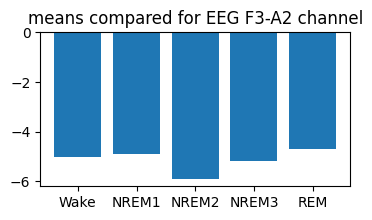

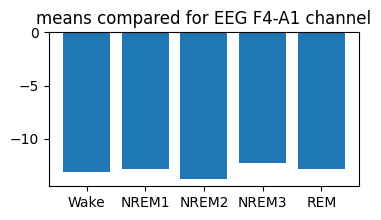

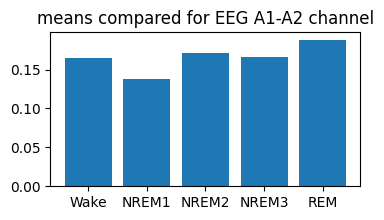

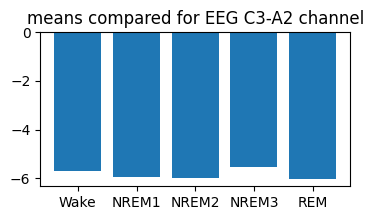

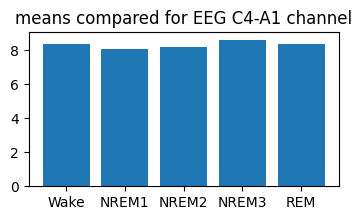

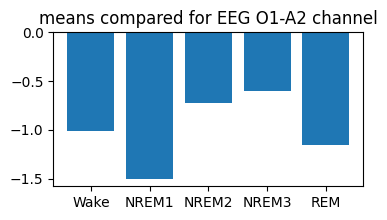

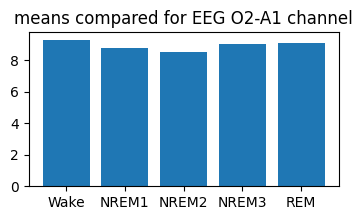

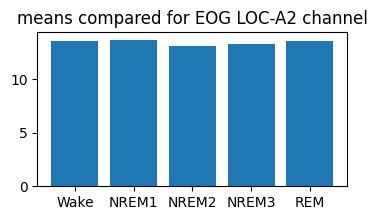

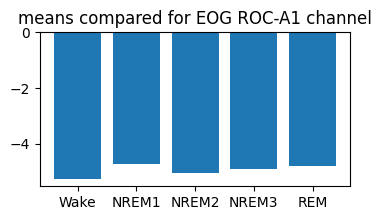

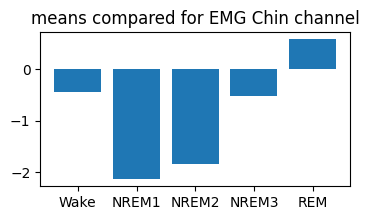

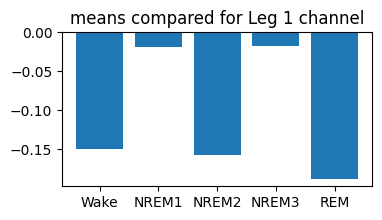

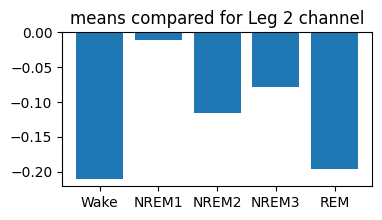

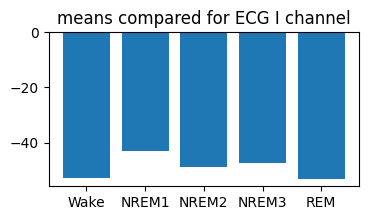

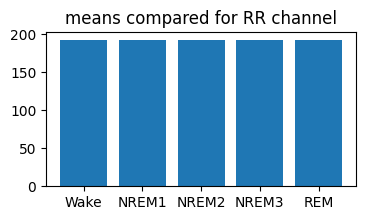

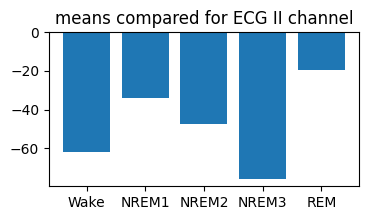

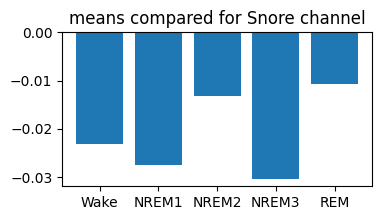

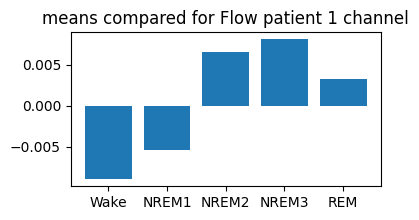

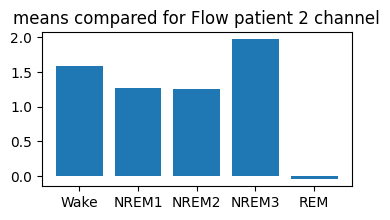

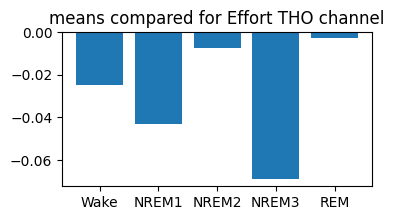

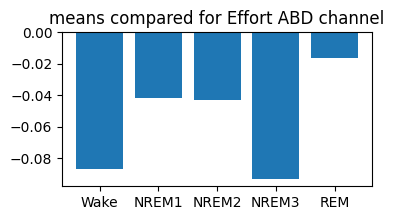

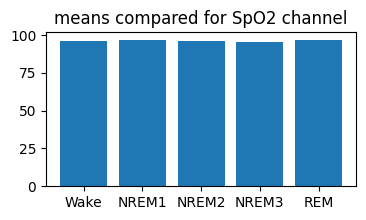

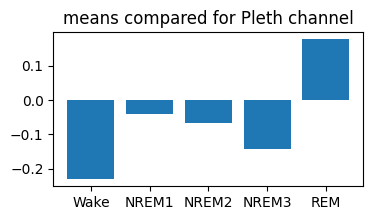

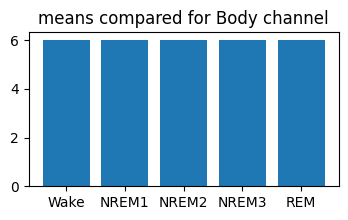

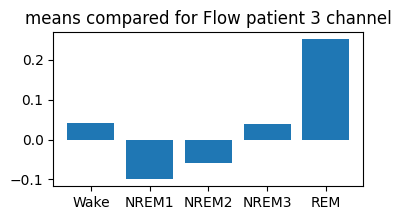

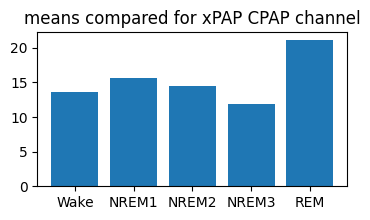

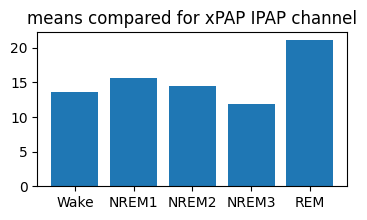

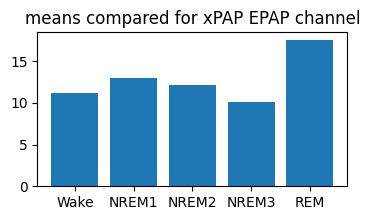

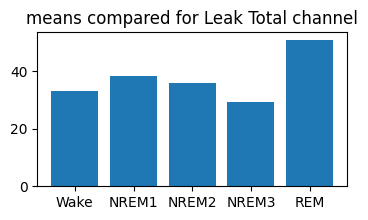

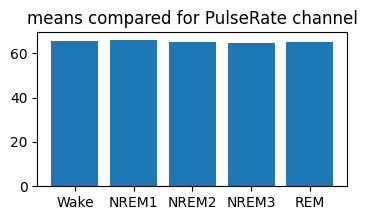

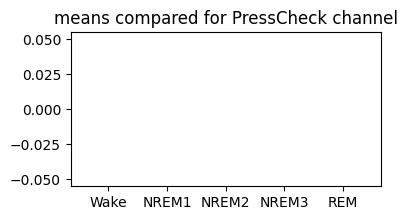

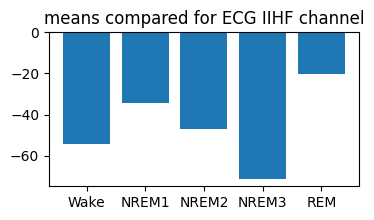

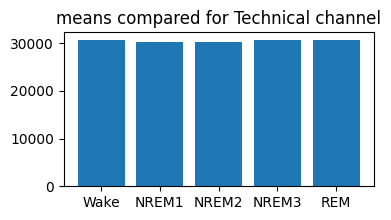

In [46]:
for i in range(len(labels)):
    plot_mean_comparison(total_user_mean_dicts, i)

# machine mean compared

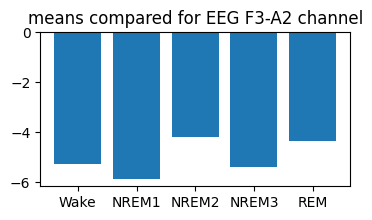

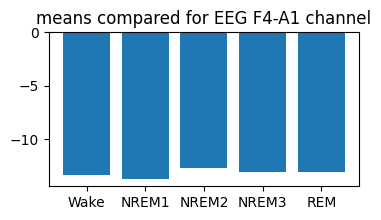

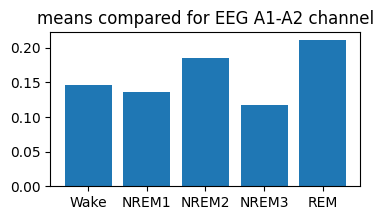

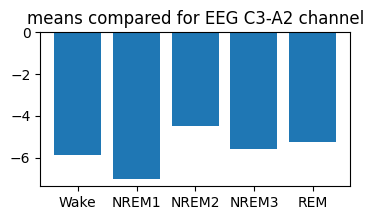

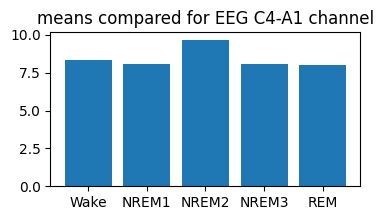

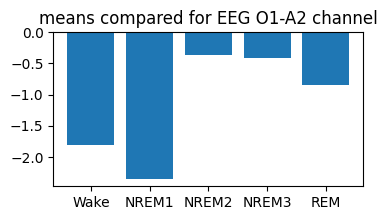

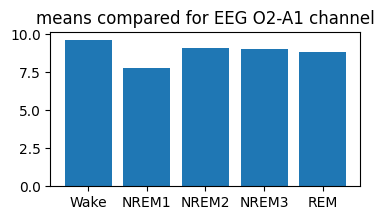

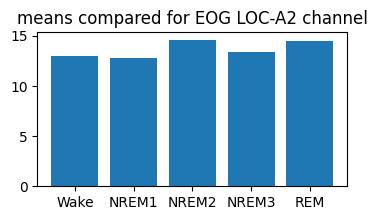

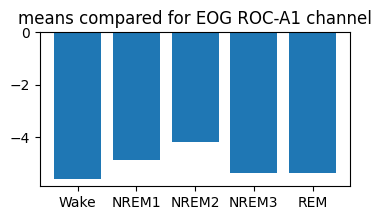

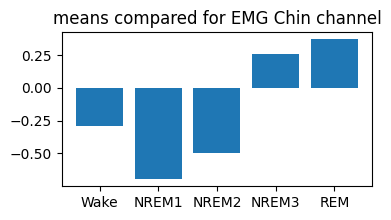

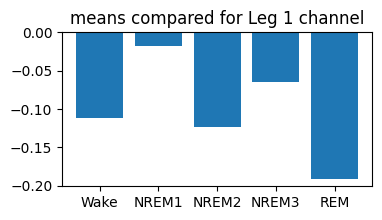

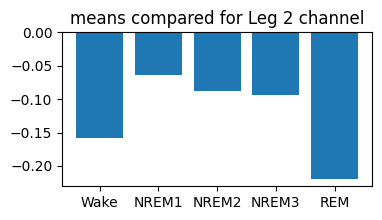

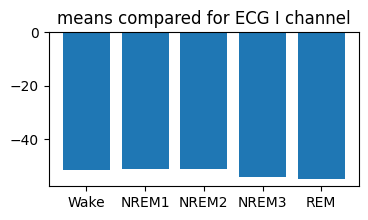

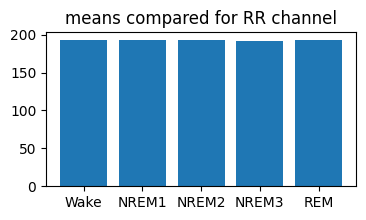

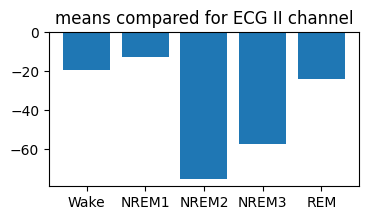

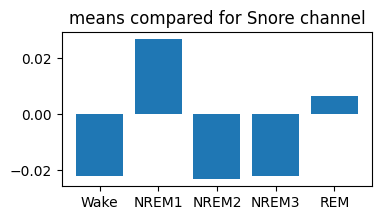

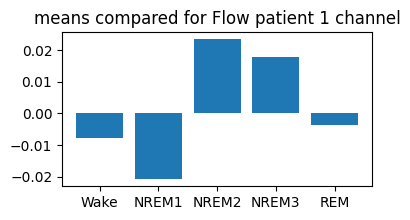

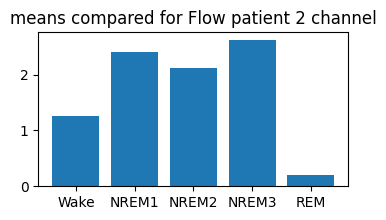

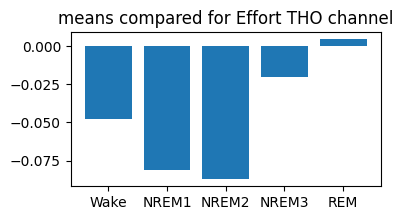

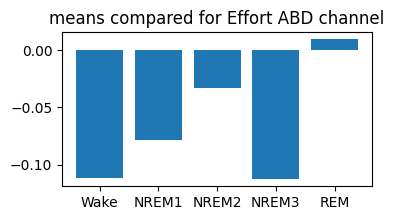

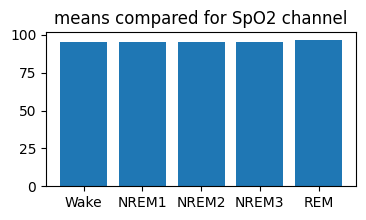

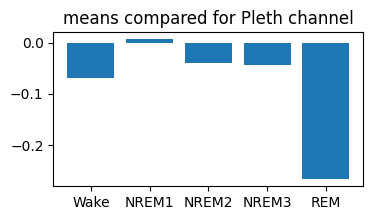

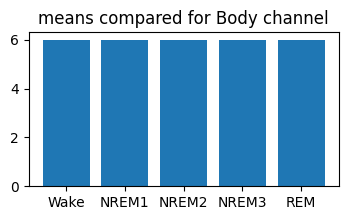

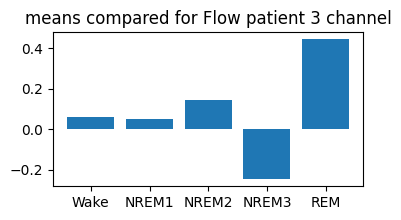

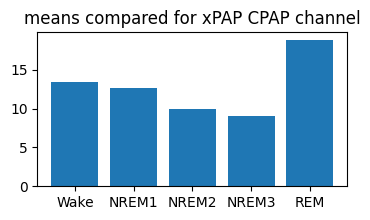

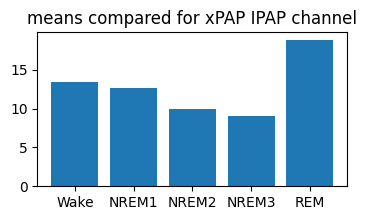

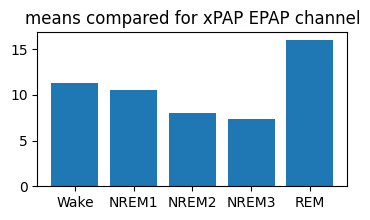

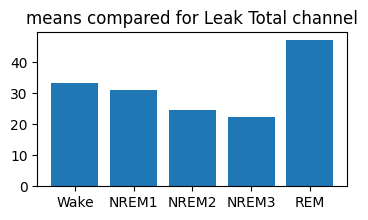

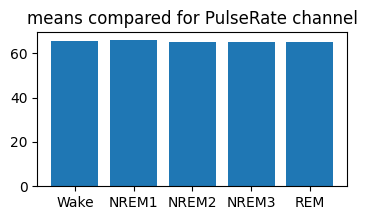

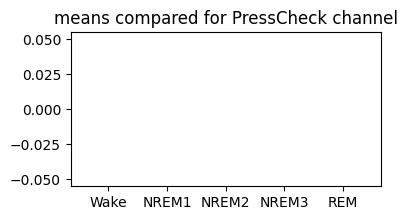

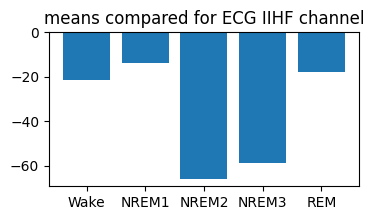

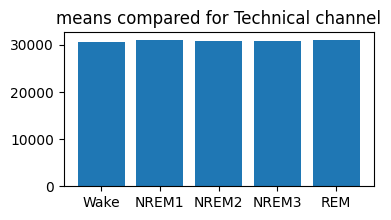

In [47]:
total_machine_mean_dicts = [total_mean_wake_dict_machine, total_mean_nrem1_dict_machine, total_mean_nrem2_dict_machine, total_mean_nrem3_dict_machine, total_mean_rem_dict_machine]
for i in range(len(labels)):
    plot_mean_comparison(total_machine_mean_dicts, i)

In [48]:
print(total_mean_wake_dict_machine)
print(total_mean_wake_dict_user)

{'EEG F3-A2': -5.278341608581825, 'EEG F4-A1': -13.315432000255548, 'EEG A1-A2': 0.1460272844429317, 'EEG C3-A2': -5.850204675901728, 'EEG C4-A1': 8.32971463015223, 'EEG O1-A2': -1.8063713402995873, 'EEG O2-A1': 9.645263216938647, 'EOG LOC-A2': 12.981494512849467, 'EOG ROC-A1': -5.597964270426212, 'EMG Chin': -0.2904773170304849, 'Leg 1': -0.11204602877462913, 'Leg 2': -0.1587026003295445, 'ECG I': -51.35344295542147, 'RR': 192.67223904998866, 'ECG II': -19.12295725958401, 'Snore': -0.021856291627058436, 'Flow patient 1': -0.007647775457835282, 'Flow patient 2': 1.2548827040650798, 'Effort THO': -0.04800876772556713, 'Effort ABD': -0.11169712278836035, 'SpO2': 95.52995839971598, 'Pleth': -0.06932910001646858, 'Body': 6.002425283241322, 'Flow patient 3': 0.05879855189210741, 'xPAP CPAP': 13.473456829797236, 'xPAP IPAP': 13.473456829797236, 'xPAP EPAP': 11.279908442700462, 'Leak Total': 33.10930030190967, 'PulseRate': 65.42477789538378, 'PressCheck': 0.0, 'ECG IIHF': -21.532482327265747,

# user var comparison

In [49]:
total_user_var_dicts = [total_var_wake_dict_user, total_var_nrem1_dict_user, total_var_nrem2_dict_user, total_var_nrem3_dict_user, total_var_rem_dict_user]
def plot_var_comparison(var_dict, index):
    values = []
    for d in var_dict:
        values.append(d[labels[index]])
    categories = ["Wake", "NREM1", "NREM2", "NREM3", "REM"]
    plt.figure(figsize=(4, 2))
    plt.bar(categories, values)
    plt.title(f"vars compared for {labels[index]} channel")
    plt.show()

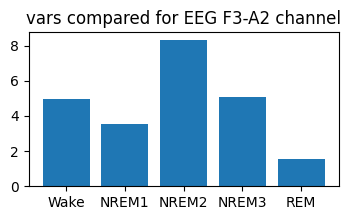

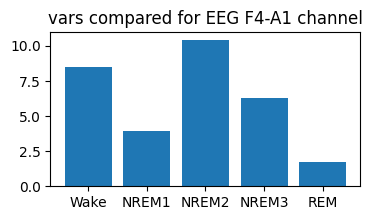

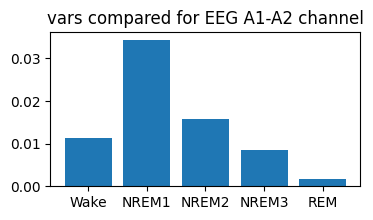

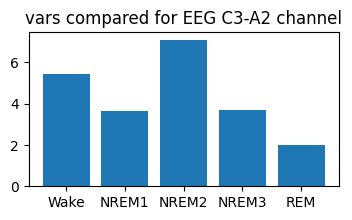

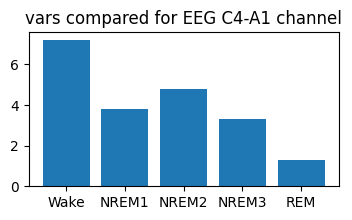

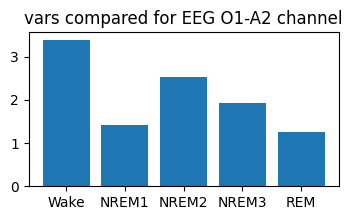

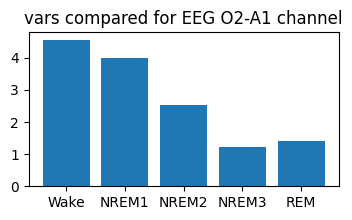

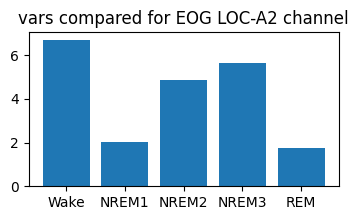

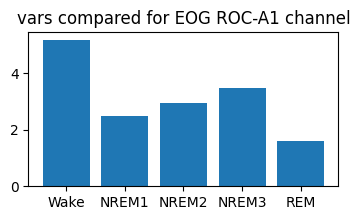

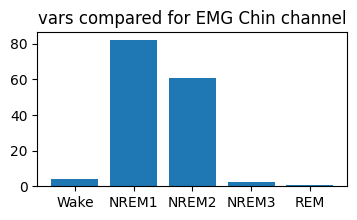

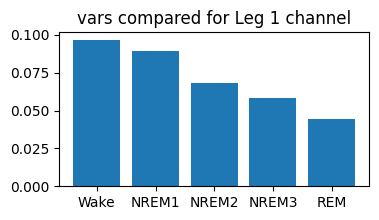

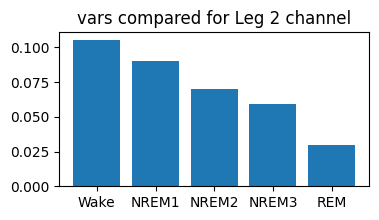

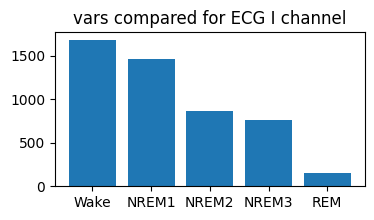

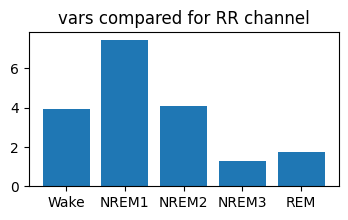

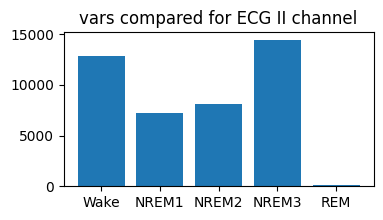

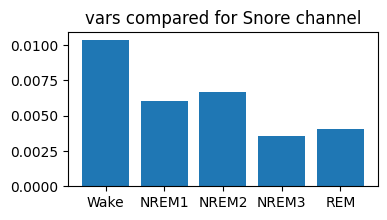

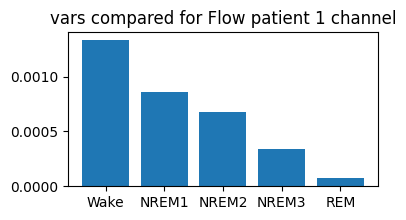

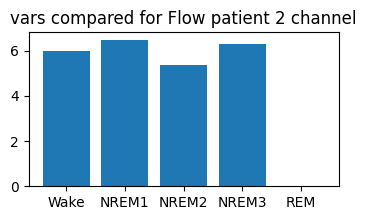

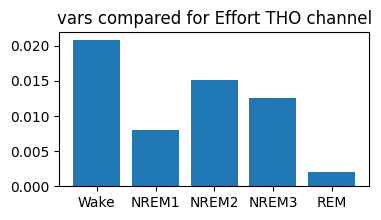

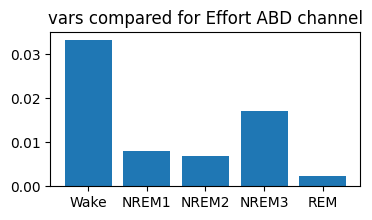

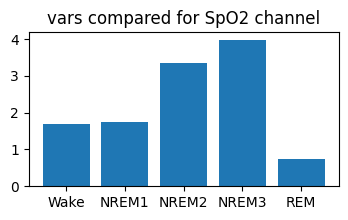

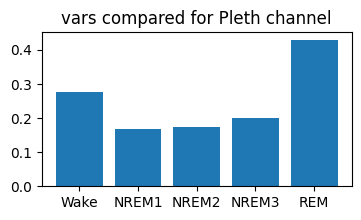

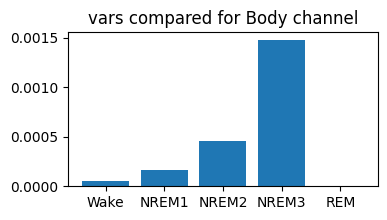

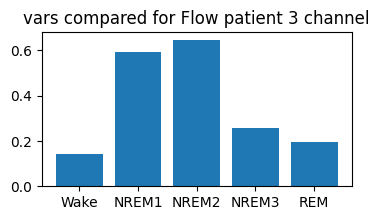

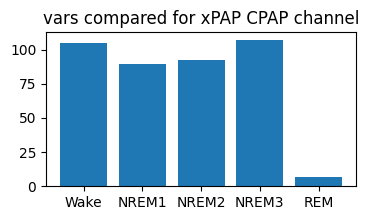

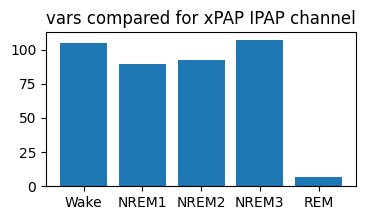

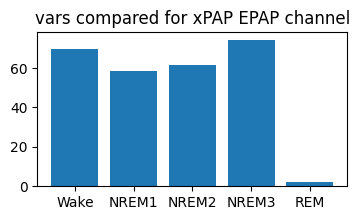

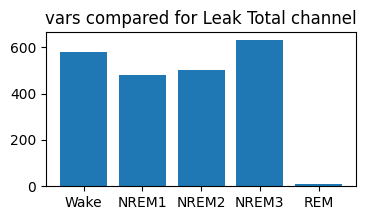

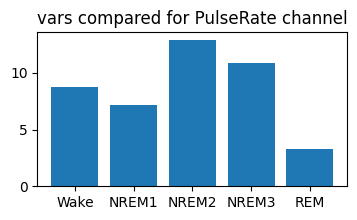

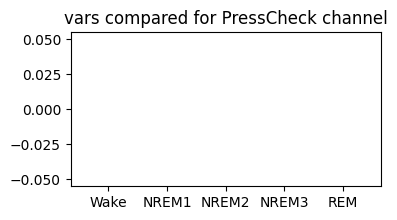

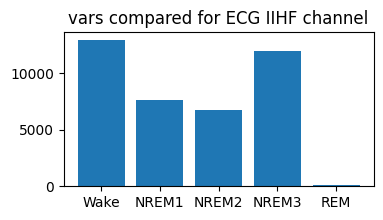

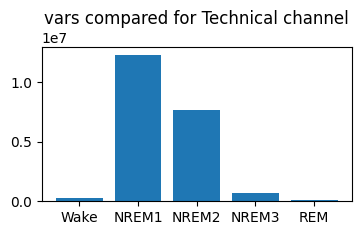

In [50]:
for i in range(len(labels)):
    plot_var_comparison(total_user_var_dicts, i)

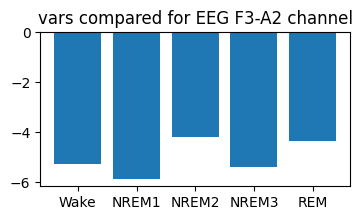

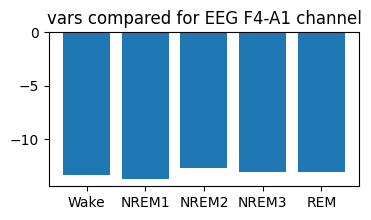

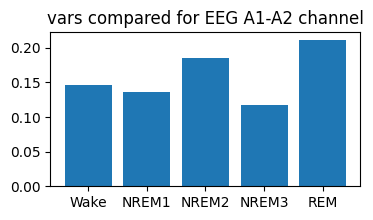

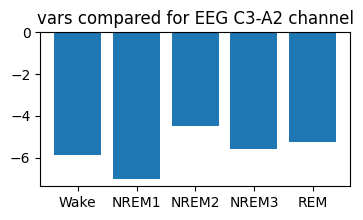

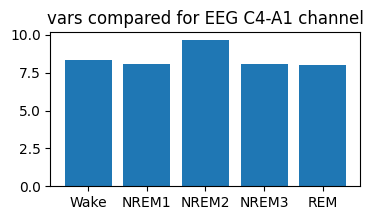

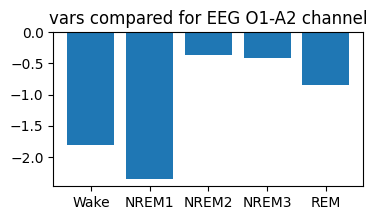

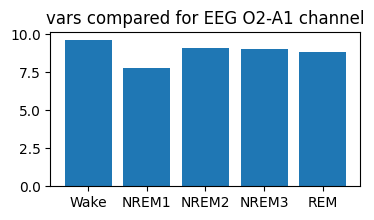

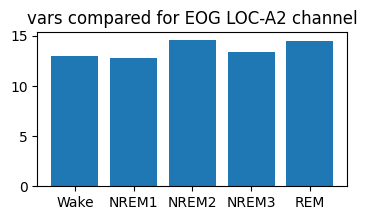

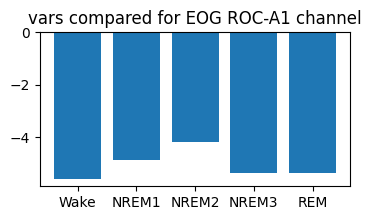

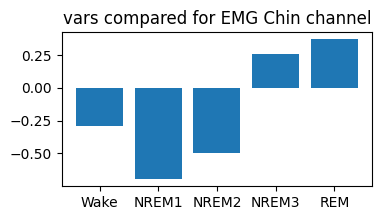

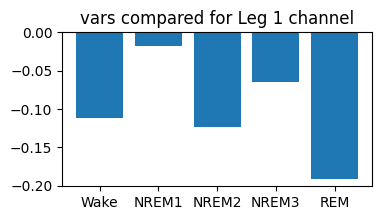

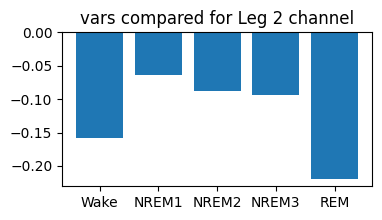

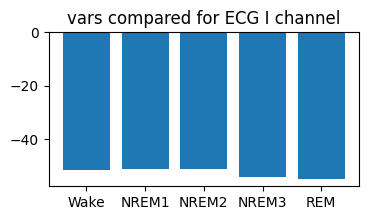

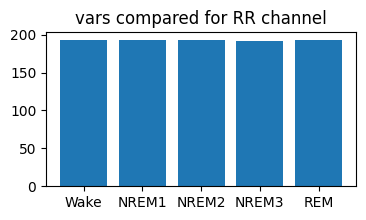

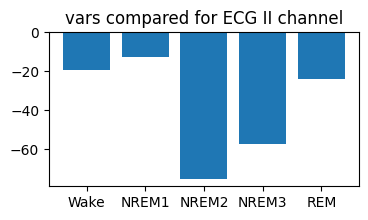

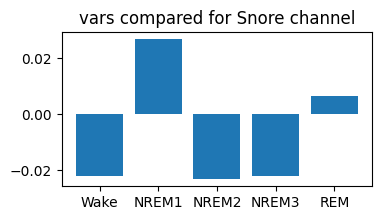

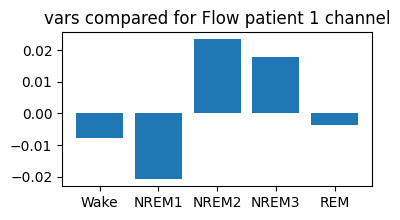

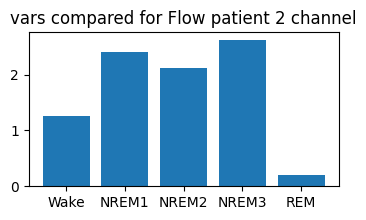

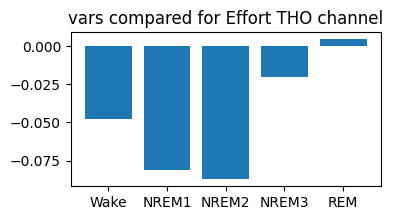

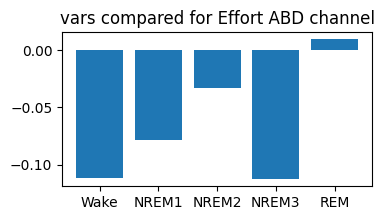

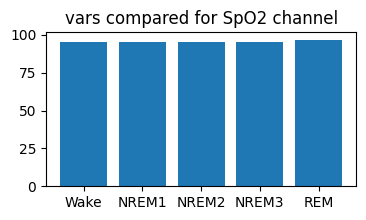

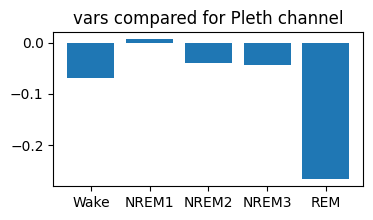

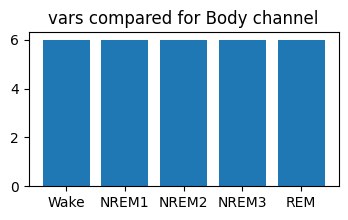

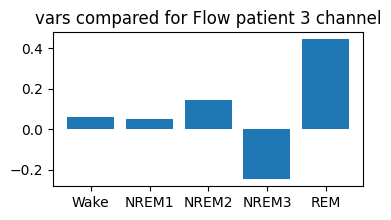

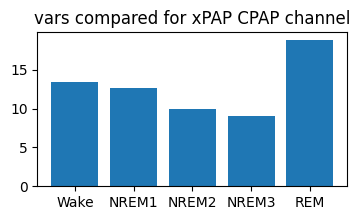

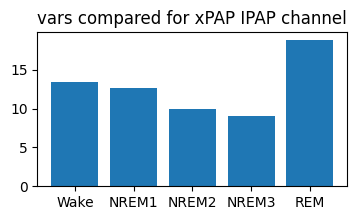

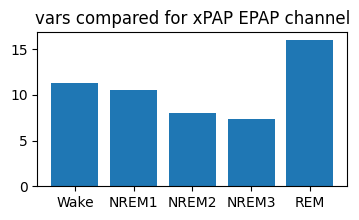

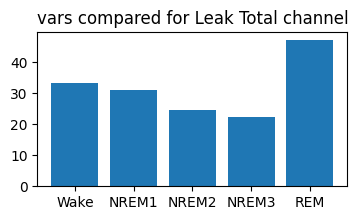

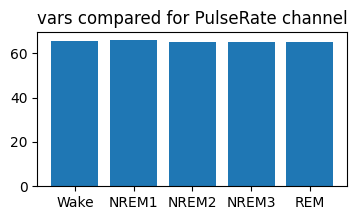

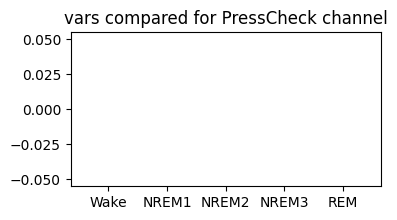

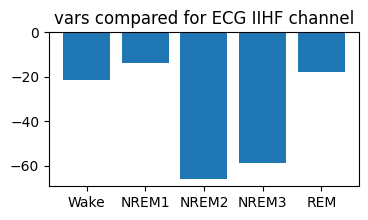

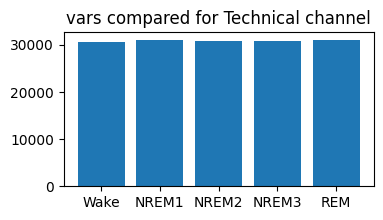

In [51]:
total_machine_mean_dicts = [total_mean_wake_dict_machine, total_mean_nrem1_dict_machine, total_mean_nrem2_dict_machine, total_mean_nrem3_dict_machine, total_mean_rem_dict_machine]
for i in range(len(labels)):
    plot_var_comparison(total_machine_mean_dicts, i)